In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


Fox Article: The issue at hand is the President of Harvard being charged with plagiarism. The charges were verified by the Free Beacon and the complainant was a professor from another university. Harvards governing body has decided to stand behind the president Claudine Gay even with additional backlash from comments regarding antisemitism. From a news reporting objectivity perspective it seems to be a lot of outside opinions in the article with them using many different quotes from different people about the issue.  

Reuters Article: This article talks about her plagiarism in a different tone. It gives more details into how different committees did their investigations into her work. It also details her submissions for citiation corrections. It goes on to talk about her antisemetic comments and how she apologized for her remarks. From a news reporting objectivity on this issue it seems to be pretty objective by just stating the facts of what has happened and what is next. 

In [7]:
import PyPDF2

def extract_text(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

pdf1_text = extract_text(r"C:\Users\kylew\OneDrive - Babson College\Grad\Spring Semester\Adv Programming\FoxNews.pdf")
pdf2_text = extract_text(r"C:\Users\kylew\OneDrive - Babson College\Grad\Spring Semester\Adv Programming\Reuters.pdf")

print("Text from News Article 1:\n", pdf1_text)
print("\nText from News Article 2:\n", pdf2_text)

Text from News Article 1:
 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Har

4b. Some anomolies I notice are random spaces that are right in the middle of words. It also includes the total count of pages in the article and what page it is on with the 1/5 for example.

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text, article_name):
    sentiment = sia.polarity_scores(text)
    print(f"Sentiment analysis for {article_name}:")
    print(sentiment)
    print("\n")

analyze_sentiment(pdf1_text, "Fox News Article")
analyze_sentiment(pdf2_text, "Reuters Article")


Sentiment analysis for Fox News Article:
{'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


Sentiment analysis for Reuters Article:
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}




5b.The sentiment analysis indicates that the Fox News article was less objective in comparison to the Reuters article. When I first read both of the articles I thought that was the case. Although when looking at the positivity of the two articles I did not think that the Fox News article would be more positive than the Reuters. Overall I agree with the outcome as the Fox News article was more opinions meaning more positive and negative vs Reuters being more object with less positive and negative.

In [11]:
headline1 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
headline2 = "Harvard president will submit dissertation edits after plagiarism allegations"

def analyze_headline(headline, source):
    sentiment = sia.polarity_scores(headline)
    print(f"Sentiment analysis for {source} headline:")
    print(sentiment)
    print("\n")

analyze_headline(headline1, "Fox News")
analyze_headline(headline2, "Reuters")


Sentiment analysis for Fox News headline:
{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


Sentiment analysis for Reuters headline:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}




6.I would say that they mostly agree with the overall sentiment as the Fox News was more negative than neutral with the Reuters being neutral and objective. 

In [15]:
import nltk
nltk.download('punkt')

from readability import Readability

def compute_readability(text, article_name):
    r = Readability(text)
    
    fk_score = r.flesch_kincaid().score 

    print(f"Readability scores for {article_name}:")
    print(f"Flesch-Kincaid Grade Level: {fk_score}")
    print(f"Automated Readability Index: {ari_score}\n")

compute_readability(pdf1_text, "Fox News Article")
compute_readability(pdf2_text, "Reuters Article")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylew\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Readability scores for Fox News Article:
Flesch-Kincaid Grade Level: 19.21912993097889
Automated Readability Index: 21.36114766486977

Readability scores for Reuters Article:
Flesch-Kincaid Grade Level: 18.02006831424553
Automated Readability Index: 19.525234076753065



7a. The Flesch-Kincaid Grade level means what school reading level is the language of the article and needed to understand it. The FK score looks at words and syllables. The ARI score is also what school reading level the language of the article is but it used characters per words and words per sentence. 
7b. The FK score shows that a higher reading level is needed for the Fox News article compared to the Reuters but they both still suggest a college or graduate school level. The ARI score is also higher on the Fox News article compared to the Reuters article with the same reading levels suggested. 

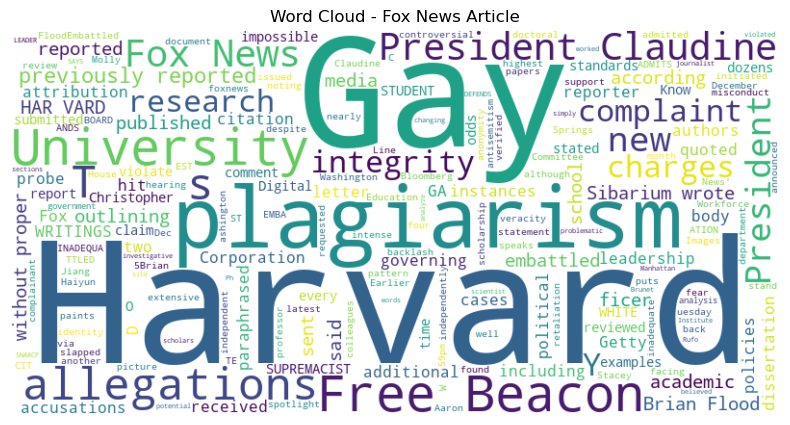

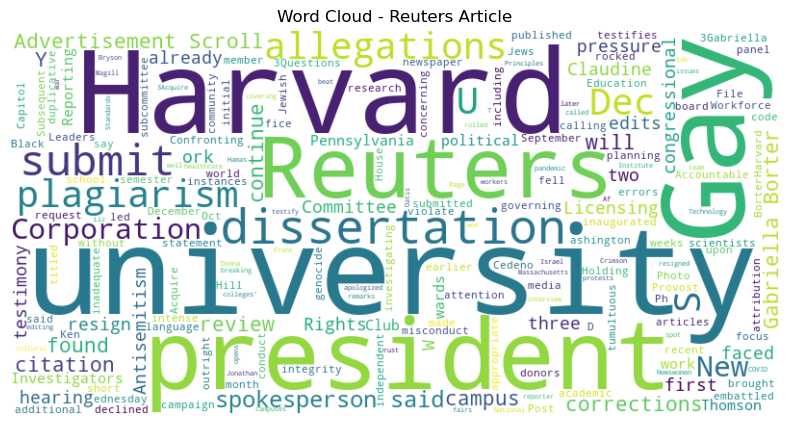

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(pdf1_text, "Word Cloud - Fox News Article")
generate_wordcloud(pdf2_text, "Word Cloud - Reuters Article")


8a. The word clouds are actually interesting as they kind of show the sentiment that I already talked about and what I got from initially reading the articles. Obviously both have Harvard, President, and Gay. Then looking at Fox you see plagiarism and allegations vs Reuters more neutral stance with university and dissertation being prominent. 